In [50]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [51]:
from PIL import Image
import os

folder = r"C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos"

folder_2 = r"C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp"
#os.mkdir(folder_2) # створити пусту папку

files_list = os.listdir(folder)

# змінюємо розмір фото на 150*150
for file in files_list:
    image = Image.open(f"C:\\Users\\PC\\Documents\\DS\\DS_7\\Lab 9\\fotos\\{file}")
    newsize = (150, 150)
    image = image.resize(newsize)
    image.save(f"{folder_2}\\{file}")

In [3]:
folder_train = r"C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\train"
os.mkdir(folder_train)
folder_test = r"C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\test"
os.mkdir(folder_test)
folder_val = r"C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\val"
os.mkdir(folder_val)

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
import os 
from random import shuffle

In [53]:
datagen = ImageDataGenerator(rescale=1. / 255)
train_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\train'
test_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\test'
val_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\val'

In [54]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 6 images belonging to 1 classes.


In [55]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

train_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\train'
test_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\test'
val_dir = r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\val'

img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 30
batch_size = 20

nb_train_samples = 320
nb_validation_samples = 40
nb_test_samples = 40


## створення нейронної мережи

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## компіляція нейронної мережі

In [57]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## створення генератора зображень

In [58]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 6 images belonging to 1 classes.


In [59]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2 images belonging to 1 classes.


In [60]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 4 images belonging to 1 classes.


## навчання моделі з використанням генераторів

In [61]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\PC\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
16/16 [==============================] - 2s 20ms/step - loss: 0.7274 - accuracy: 0.1667 - val_loss: 0.1213 - val_accuracy: 1.0000


## перевірка моделі на тестовому наборі

In [62]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

print('Точність на тестових даних - %.2f%%' % (scores[1]*100))

Точність на тестових даних - 100.00%


C:\Users\PC\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


## збереження моделі

In [63]:
model_name = "people.model"
model.save(model_name)

INFO:tensorflow:Assets written to: people.model\assets


In [64]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt


AttributeError: 'Sequential' object has no attribute 'predict_classes'

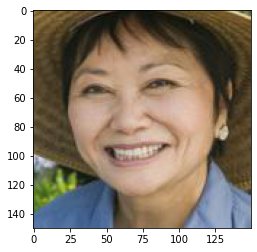

In [65]:
import tensorflow as tf
import tensorflow.keras as K
import os

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

# load model from saved chackpoint
model = tf.keras.models.load_model(r'C:\Users\PC\Documents\DS\DS_7\Lab 9\people.model')

image_a = plt.imread(r'C:\Users\PC\Documents\DS\DS_7\Lab 9\fotos_tmp\val\val\woman.jpg')
plt.imshow(image_a)

image_a = np.asarray(image_a)/255
image_a = np.reshape(image_a,(1, 150,150,3))

# view output
classes = model.predict_classes(image_a)

# print the classes, the images belong to
if classes == [[0]]:
    print("\nIt's a man")
else:
    print("\nIt's a woman")
